In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt -O /tmp/irish-lyrics-eof.txt


--2020-05-16 04:58:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-05-16 04:58:28 (163 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # (+1) for <OOV> token

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

#create predictors and labels
X, labels = input_sequences[:, :-1], input_sequences[:, -1]

y = keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(X[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
print(y[6])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [28]:
model = keras.Sequential([
                          keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
                          keras.layers.Bidirectional(keras.layers.LSTM(150)),
                          keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
# early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_4 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [29]:
print(model)

In [30]:
# history = model.fit(X, y, epochs=100, verbose=1, callbacks=[early_stop])
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 3s 8ms/step - loss: 6.6285 - accuracy: 0.0739
Epoch 2/100
377/377 [==============================] - 3s 8ms/step - loss: 5.6994 - accuracy: 0.1209
Epoch 3/100
377/377 [==============================] - 3s 8ms/step - loss: 4.7641 - accuracy: 0.1738
Epoch 4/100
377/377 [==============================] - 3s 8ms/step - loss: 3.8367 - accuracy: 0.2451
Epoch 5/100
377/377 [==============================] - 3s 8ms/step - loss: 2.9948 - accuracy: 0.3575
Epoch 6/100
377/377 [==============================] - 3s 8ms/step - loss: 2.3595 - accuracy: 0.4664
Epoch 7/100
377/377 [==============================] - 3s 8ms/step - loss: 1.8828 - accuracy: 0.5596
Epoch 8/100
377/377 [==============================] - 3s 8ms/step - loss: 1.5385 - accuracy: 0.6324
Epoch 9/100
377/377 [==============================] - 3s 8ms/step - loss: 1.3519 - accuracy: 0.6780
Epoch 10/100
377/377 [==============================] - 3s 8ms/step - loss: 1.1517 - accura

In [0]:
def plot_graphs(history, string):
    plt.plot(history.history[str(string)])
    plt.xlabel('Epochs')
    plt.ylabel(str(string))
    plt.show()

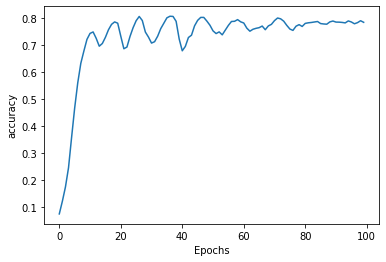

In [32]:
plot_graphs(history, 'accuracy')

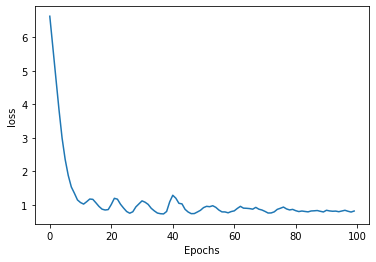

In [33]:
plot_graphs(history, 'loss')

In [38]:
seed_text = "Don't stop me now"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word = word
            break
    seed_text += ' ' + output_word


print(seed_text)

Don't stop me now quite but i slept until the dawn shining pike all purer and i i find in your cheek well may be surely and brave to mothers thinking of connemara away from killarney home again and my parents confess be forgot make thee more saint might dwell and seven was near da or be my mother gone away gone and gone the way will love many he brow my you bore who is the grief and ive i might as well be as you you well peeled today and heavy odds he bore a true mans part heartfrom sinking me i
